In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#hotel = pd.read_csv("hotel_bookings(1).csv")
hotel = pd.read_csv("hotel_bookings.csv")

In [3]:
display(hotel)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119389,City Hotel,0.0,23.0,2017.0,August,35.0,30.0,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119390,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119391,City Hotel,0.0,34.0,2017.0,August,35.0,31.0,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119392,City Hotel,0.0,109.0,2017.0,August,35.0,31.0,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


In [23]:
hotel['is_canceled'].isna().sum()

np.int64(6)

# Data Analysis

In [4]:
# Display count of each booking status
print((hotel["is_canceled"].value_counts()).values)

# Display percentage of each booking status
print((hotel["is_canceled"].value_counts() * 100).values) 

[75163 44225]
[7516300 4422500]


## Consider Lead Time as a Possible Factor Influencing Cancellations

In [5]:
print(hotel["lead_time"].describe())

count    119393.000000
mean        104.010872
std         106.861793
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64


In [6]:
# To ensure balanced comparison, divide lead time into quartile-based ranges, distributing bookings evenly across groups
bins = [0, 18, 69, 160, 999999] 

# Label each lead time range for clarity
labels = ['0-18 days', '18-69 days', '69-160 days', '160+ days']

# Categorize bookings into lead time groups using the defined bins
hotel['lead_time_group'] = pd.cut(hotel['lead_time'], bins=bins, labels=labels, right=False)

# Calculate cancellation rate (%) within each lead time group
leadtime_cancellation_rates = hotel.groupby('lead_time_group')['is_canceled'].mean() * 100 

print(leadtime_cancellation_rates)

lead_time_group
0-18 days      14.161457
18-69 days     35.660548
69-160 days    42.571619
160+ days      55.321700
Name: is_canceled, dtype: float64


/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_47608/2737270628.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  leadtime_cancellation_rates = hotel.groupby('lead_time_group')['is_canceled'].mean() * 100


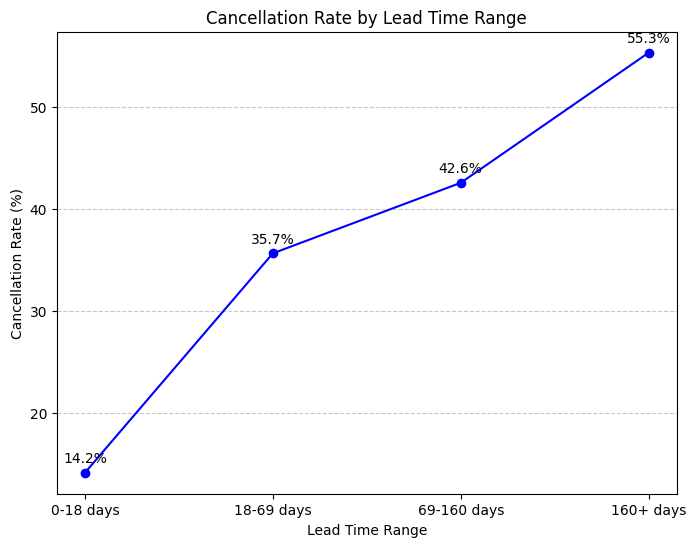

In [7]:
# Draw line graph
plt.figure(figsize=(8, 6))
plt.plot(leadtime_cancellation_rates.index, leadtime_cancellation_rates.values, marker='o', linestyle='-', color='blue')

# Loop to label each data point with its value
for i in range(len(leadtime_cancellation_rates)):
    x = leadtime_cancellation_rates.index[i]
    y = leadtime_cancellation_rates.values[i]
    plt.text(x, y + 1, f'{y:.1f}%', ha='center') 
    
# Label the graph
plt.xlabel("Lead Time Range")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Lead Time Range")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Consider ADR as a Possible Factor Influencing Cancellations

In [8]:
print(hotel["adr"].describe())

count    119386.000000
mean        101.830557
std          50.533138
min          -6.380000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64


In [9]:
# Get median ADR for total, canceled, and not canceled bookings
adr_total = hotel["adr"].median()
adr_canceled = hotel[hotel["is_canceled"] == 1]["adr"].median()
adr_not_canceled = hotel[hotel["is_canceled"] == 0]["adr"].median()

# Get mean ADR for total, canceled, and not canceled bookings
adr_total_mean = hotel["adr"].mean()
adr_canceled_mean = hotel[hotel["is_canceled"] == 1]["adr"].mean()
adr_not_canceled_mean = hotel[hotel["is_canceled"] == 0]["adr"].mean()

# Combine results into a comparison table to observe ADR trends by cancellation status
adr_comparison_hotel = pd.DataFrame({
    "Cancellation Status": ["Total","Not Canceled", "Canceled"],
    "Median ADR": [adr_total, adr_not_canceled, adr_canceled],
    "Mean ADR": [adr_total_mean, adr_not_canceled_mean, adr_canceled_mean]
})

print(adr_comparison_hotel)

  Cancellation Status  Median ADR    Mean ADR
0               Total       94.59  101.830557
1        Not Canceled       92.50   99.985641
2            Canceled       96.20  104.957405


In [10]:
# To ensure balanced comparison, divide ADR into quartile-based ranges, distributing bookings evenly across groups
bins = [0, 70, 95, 125, 999999] 
bins = [0, 70, 95, 125, 999999] 
labels = ['0-70', '70-95', '95-125', '125+']

# Group bookings into ADR ranges based on defined bins
hotel['adr_group'] = pd.cut(hotel['adr'], bins=bins, labels=labels, right=False)

# Calculate cancellation rate (%) within each ADR group (proportion where is_canceled = 1)
adr_cancellation_rates = hotel.groupby('adr_group')['is_canceled'].mean() * 100  

print(adr_cancellation_rates)

adr_group
0-70      33.354388
70-95     36.969840
95-125    39.092113
125+      38.793020
Name: is_canceled, dtype: float64


/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_47608/3734467504.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adr_cancellation_rates = hotel.groupby('adr_group')['is_canceled'].mean() * 100


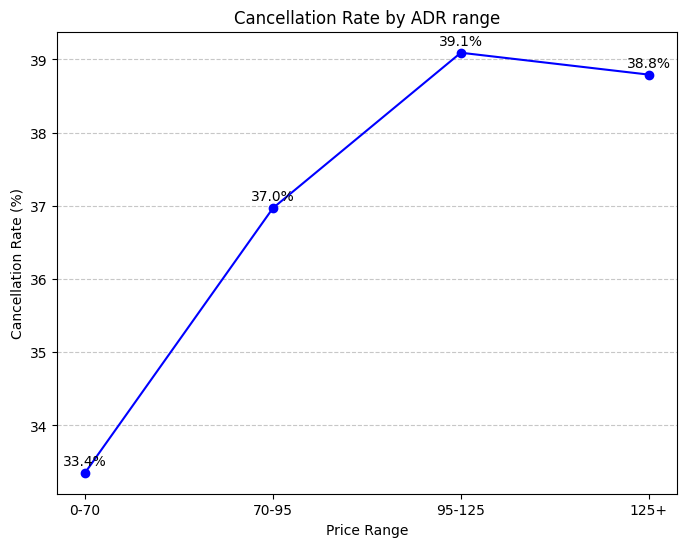

In [11]:
# Draw line graph
plt.figure(figsize=(8, 6))
plt.plot(adr_cancellation_rates.index, adr_cancellation_rates.values, marker='o', linestyle='-', color='blue')

# Loop to label each data point with its value
for i in range(len(adr_cancellation_rates)):
    x = adr_cancellation_rates.index[i]
    y = adr_cancellation_rates.values[i]
    plt.text(x, y + 0.1, f'{y:.1f}%', ha='center') 

# Label the graph
plt.xlabel("Price Range")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by ADR range")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## Consider Hotel Type as a Possible Factor Influencing Cancellations

In [12]:
print(hotel["hotel"].unique()) 

['Resort Hotel' 'City Hotel']


In [13]:
# Calculate the booking percentage of each hotel type
hotel_booking_ratio = hotel["hotel"].value_counts(normalize=True) * 100

# Convert result to DataFrame for easier viewing and labeling
hotel_booking_ratio_hotel = hotel_booking_ratio.reset_index()
hotel_booking_ratio_hotel.columns = ["Hotel Type", "Booking Percentage (%)"]

print(hotel_booking_ratio_hotel)

     Hotel Type  Booking Percentage (%)
0    City Hotel               66.444712
1  Resort Hotel               33.555288


In [14]:
# Calculate cancellation rate (%) for each hotel type
hotel_cancellation_rate = hotel.groupby("hotel")["is_canceled"].mean() * 100

# Convert result to DataFrame for clearer formatting
hotel_cancellation_rate_hotel = hotel_cancellation_rate.reset_index()
hotel_cancellation_rate_hotel.columns = ["Hotel Type", "Cancellation Rate (%)"]

print(hotel_cancellation_rate_hotel)

     Hotel Type  Cancellation Rate (%)
0    City Hotel              41.727698
1  Resort Hotel              27.765434


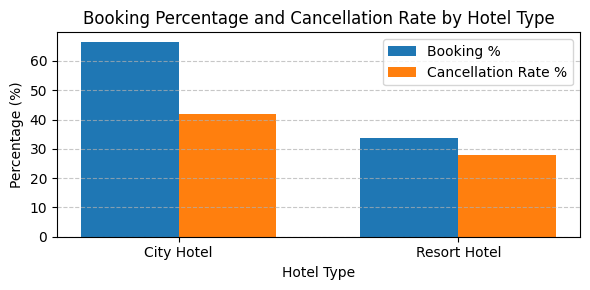

In [15]:
# Merge booking percentage and cancellation rate by hotel type
merged = pd.merge(hotel_booking_ratio_hotel, hotel_cancellation_rate_hotel, on="Hotel Type")

# Set up bar positions and width for grouped bars
x = range(len(merged["Hotel Type"]))
width = 0.35  

fig, ax = plt.subplots(figsize=(6, 3))

# Plot booking percentage and cancellation rate bars
bars1 = ax.bar([i - width/2 for i in x], merged["Booking Percentage (%)"], width, label='Booking %')
bars2 = ax.bar([i + width/2 for i in x], merged["Cancellation Rate (%)"], width, label='Cancellation Rate %')

# Label the chart
ax.set_xlabel('Hotel Type')
ax.set_ylabel('Percentage (%)')
ax.set_title('Booking Percentage and Cancellation Rate by Hotel Type')
ax.set_xticks(x)
ax.set_xticklabels(merged["Hotel Type"])

# Add legend and grid for clarity
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

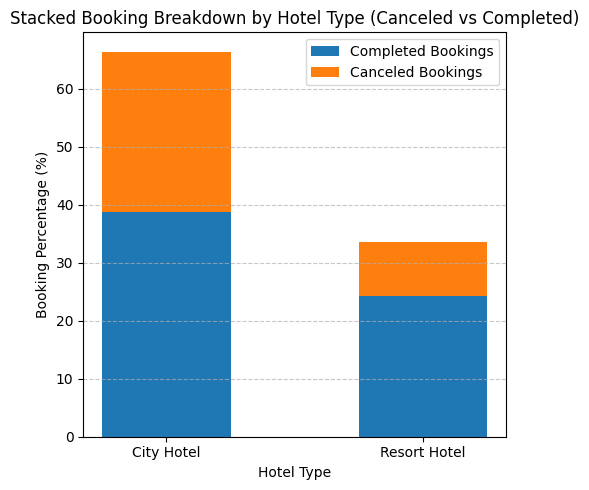

In [16]:
# Calculate percentage of canceled and completed bookings from total bookings
merged["Canceled % (of bookings)"] = (
    merged["Booking Percentage (%)"] * merged["Cancellation Rate (%)"] / 100
)
merged["Not Canceled %"] = (
    merged["Booking Percentage (%)"] - merged["Canceled % (of bookings)"]
)

# Set bar positions and width
x = range(len(merged["Hotel Type"]))
width = 0.5

# Prepare data for stacked bar chart
booking_status = {
    "Completed Bookings": merged["Not Canceled %"].values,
    "Canceled Bookings": merged["Canceled % (of bookings)"].values,
}

# Track cumulative height for stacking
bottom = [0] * len(x)

# Draw stacked bar chart
fig, ax = plt.subplots(figsize=(5, 5))

for label, values in booking_status.items():
    bars = ax.bar(x, values, width, label=label, bottom=bottom)
    bottom += values

# Label the stacked bar chart
ax.set_xlabel('Hotel Type')
ax.set_ylabel('Booking Percentage (%)')
ax.set_title('Stacked Booking Breakdown by Hotel Type (Canceled vs Completed)')
ax.set_xticks(x)
ax.set_xticklabels(merged["Hotel Type"])
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Consider Previous Cancellations as a Possible Factor Influencing Cancellations

In [17]:
print(hotel["previous_cancellations"].unique())

[ 0  1  2  3 26 25 14  4 24 19  5 21  6 13 11]


In [18]:
# Count how many bookings had each number of previous cancellations
previous_cancellation_frequencies = hotel["previous_cancellations"].value_counts().sort_index()
print(previous_cancellation_frequencies)

previous_cancellations
0     112910
1       6051
2        116
3         65
4         31
5         19
6         22
11        35
13        12
14        14
19        19
21         1
24        48
25        25
26        26
Name: count, dtype: int64


In [19]:
# Calculate cancellation rate (%) for each previous_cancellations count
previous_cancellation_rates = hotel.groupby("previous_cancellations")["is_canceled"].mean() * 100 
print(previous_cancellation_rates)

previous_cancellations
0      33.907567
1      94.430673
2      32.758621
3      30.769231
4      22.580645
5      10.526316
6      31.818182
11     28.571429
13     91.666667
14    100.000000
19    100.000000
21    100.000000
24    100.000000
25    100.000000
26    100.000000
Name: is_canceled, dtype: float64


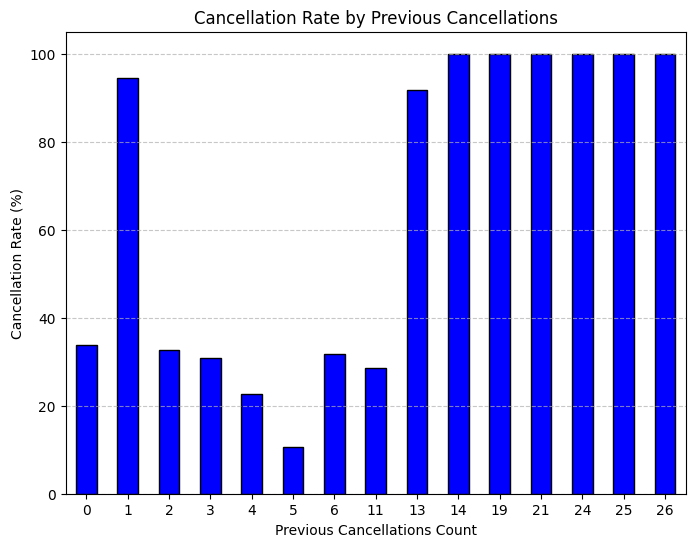

In [20]:
plt.figure(figsize=(8, 6))

# Plot cancellation rate by previous cancellation count as a bar chart
previous_cancellation_rates.plot(kind='bar', color='blue', edgecolor='black')

# Label the bar chart
plt.xlabel("Previous Cancellations Count")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Previous Cancellations")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

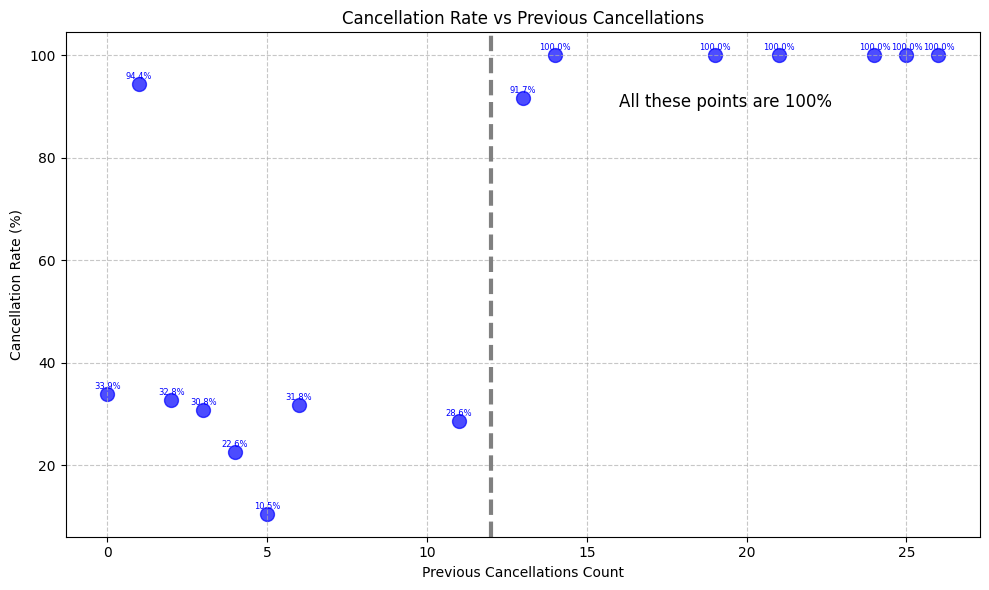

In [21]:
# Extract cancellation rate (%) by number of previous cancellations
hotel["previous_cancellations"]
previous_cancellation_rates = hotel.groupby("previous_cancellations")["is_canceled"].mean() * 100
x_values = previous_cancellation_rates.index.to_list()
y_values = previous_cancellation_rates.values.tolist()

# Draw a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x_values, y_values, color='blue', alpha=0.7, s=100)

# Loop to label each data point with its value
for i in range(len(x_values)):
    x = x_values[i]
    y = y_values[i]
    ax.text(x, y + 1, f"{y:.1f}%", ha='center', fontsize=6, color='blue')

# Label the scatter plot
ax.set_xlabel("Previous Cancellations Count")
ax.set_ylabel("Cancellation Rate (%)")
ax.set_title("Cancellation Rate vs Previous Cancellations")

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Highlight area with extremely high cancellation rate (13+ previous cancellations)
ax.axvline(x=12, color='gray', linestyle='--', linewidth=3)
ax.text(x=16, y=90, s="All these points are 100%", fontsize=12, color='black')

plt.tight_layout()
plt.show()

# Graphical Representation

/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_47608/3177082685.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_cancel = hotel.groupby('lead_time_group')['is_canceled'].mean() * 100
/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_47608/3177082685.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adr_cancel = hotel.groupby('adr_group')['is_canceled'].mean() * 100


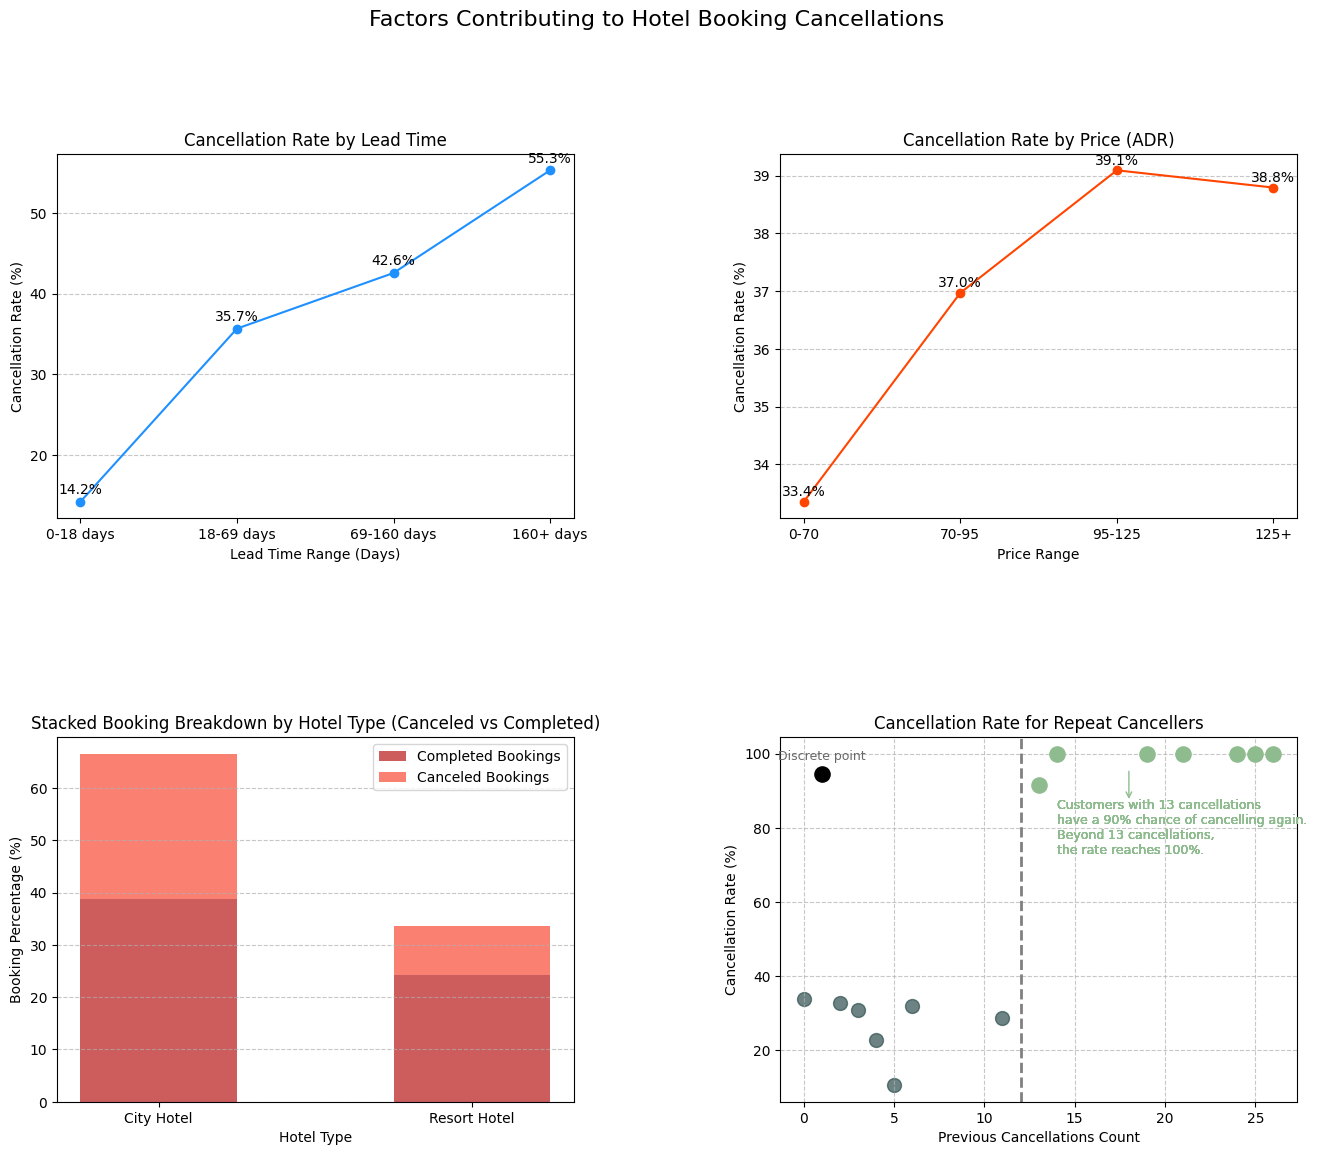

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Factor 1: Lead Time – group into ranges and calculate cancellation rate
lead_bins = [0, 18, 69, 160, 999999]
lead_labels = ['0-18 days', '18-69 days', '69-160 days', '160+ days']
hotel['lead_time_group'] = pd.cut(hotel['lead_time'], bins=lead_bins, labels=lead_labels, right=False)
lead_cancel = hotel.groupby('lead_time_group')['is_canceled'].mean() * 100

# Plot lead time vs cancellation rate
ax[0, 0].plot(lead_cancel.index, lead_cancel.values, marker='o', color='dodgerblue')
ax[0, 0].set_title("Cancellation Rate by Lead Time")
ax[0, 0].set_xlabel("Lead Time Range (Days)")
ax[0, 0].set_ylabel("Cancellation Rate (%)")
ax[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Annotate lead time points
for i in range(len(leadtime_cancellation_rates)):
    x = leadtime_cancellation_rates.index[i]
    y = leadtime_cancellation_rates.values[i]
    ax[0,0].text(x, y + 1, f'{y:.1f}%', ha='center') 

# Factor 2: ADR – group into price ranges and calculate cancellation rate
adr_bins = [0, 70, 95, 125, 999999]
adr_bins = [0, 70, 95, 125, 999999]
adr_labels = ['0-70', '70-95', '95-125', '125+']
hotel['adr_group'] = pd.cut(hotel['adr'], bins=adr_bins, labels=adr_labels, right=False)
adr_cancel = hotel.groupby('adr_group')['is_canceled'].mean() * 100

# Plot ADR vs cancellation rate
ax[0, 1].plot(adr_cancel.index, adr_cancel.values, marker='o', color='orangered')
ax[0, 1].set_title("Cancellation Rate by Price (ADR)")
ax[0, 1].set_xlabel("Price Range")
ax[0, 1].set_ylabel("Cancellation Rate (%)")
ax[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Annotate ADR points
for i in range(len(adr_cancellation_rates)):
    x = adr_cancellation_rates.index[i]
    y = adr_cancellation_rates.values[i]
    ax[0,1].text(x, y + 0.1, f'{y:.1f}%', ha='center')
    
# Factor 3: Hotel Type – calculate completed vs canceled bookings
x = range((len(merged["Hotel Type"])))
width = 0.5

merged["Canceled % (of bookings)"] = (
    merged["Booking Percentage (%)"] * merged["Cancellation Rate (%)"] / 100
)

merged["Not Canceled %"] = (
    merged["Booking Percentage (%)"] - merged["Canceled % (of bookings)"]
)

# Plot stacked bars of cancellation vs completion by hotel type
bars1 = ax[1,0].bar(x, merged["Not Canceled %"], width, label='Completed Bookings', color='indianred')
bars2 = ax[1,0].bar(
    x,
    merged["Canceled % (of bookings)"],
    width,
    bottom=merged["Not Canceled %"],
    label='Canceled Bookings',
    color='salmon'
)

ax[1,0].set_xlabel('Hotel Type')
ax[1,0].set_ylabel('Booking Percentage (%)')
ax[1,0].set_title('Stacked Booking Breakdown by Hotel Type (Canceled vs Completed)')
ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(merged["Hotel Type"])
ax[1,0].legend()
ax[1,0].grid(axis='y', linestyle='--', alpha=0.7)

# Factor 4: Previous Cancellations – scatter and annotate high-risk group
previous_cancellation_rates = hotel.groupby("previous_cancellations")["is_canceled"].mean() * 100
x_values = previous_cancellation_rates.index.to_list()
y_values = previous_cancellation_rates.values.tolist()

ax[1,1].set_xlabel("Previous Cancellations Count")
ax[1,1].set_ylabel("Cancellation Rate (%)")
ax[1,1].set_title("Cancellation Rate for Repeat Cancellers")
ax[1,1].grid(True, linestyle='--', alpha=0.7)
ax[1,1].axvline(x=12, color='gray', linestyle='--', linewidth=2)

# Annotate scatter points based on cancellation behavior
for i in range(len(x_values)):
    x = x_values[i]
    y = y_values[i]

    if x == 1:
        ax[1,1].scatter(x, y, color='black', s=120, zorder=5)
        ax[1,1].text(x, y + 4, "Discrete point", color='dimgray', fontsize=9, ha='center')

    elif x >= 13:
        ax[1,1].scatter(x, y, color='darkseagreen', s=120, zorder=5)
        ax[1,1].text(
            x=14, 
            y=73, 
            s="Customers with 13 cancellations\nhave a 90% chance of cancelling again.\nBeyond 13 cancellations,\nthe rate reaches 100%.", 
            fontsize=9, 
            color='darkseagreen'
)

    else:
        ax[1,1].scatter(x, y, color='darkslategray', alpha=0.7, s=100)

        
# Add arrow annotation for extreme behavior
ax[1,1].annotate(
    "",                
    xy=(18, 87), 
    xytext=(18, 96),         
    arrowprops=dict(
        arrowstyle="->",
        color="darkseagreen"
    )
)

# Set overall figure title and layout
fig.suptitle("Factors Contributing to Hotel Booking Cancellations", fontsize=16, y=1.02)
plt.subplots_adjust(top=0.90)
fig.savefig("Factors_Contributing_to_Hotel_Booking_Cancellations", dpi=300)

plt.subplots_adjust(hspace=0.6, wspace=0.4)

# Mini-report

## Business Question
What factors contribute to a higher likelihood of hotel booking cancellations, and how can the hotel reduce cancellation rates to improve revenue stability?


## Relevance
This question is critical for revenue management. High cancellation rates disrupt planning, waste digital resources, and increase costs. Improving occupancy rates directly enhances profitability.


## Data Justification
1. Lead Time: Longer lead times are linked to higher cancellation rates due to greater uncertainty. This supports limiting early bookings or applying tiered pricing.
2. ADR: In general, higher-priced bookings are associated with higher cancellation rates, with the peak observed in the 95–125 range. This suggests the hotel should reassess its pricing strategy, particularly in comparison to competitors.
3. Hotel Type: City hotels have higher cancellation rates than resorts. Shifting focus to resort bookings could improve show-up rates.
4. Previous Cancellations: While even customers with one prior cancellation show a high risk of cancelling again, those with over 13 previous cancellations have a 100% cancellation rate. Introducing a blocklist for repeat cancellers could significantly improve the realised stay rate.


## Findings and Insights
Cancellations are driven by timing, pricing, hotel type, and customer patterns. The hotel can reduce cancellations by adjusting pricing, limiting early bookings, discouraging frequent cancellers, and focusing on more stable segments like resorts—improving both predictability and profitability.

Overall mark: 68

#### Business Question:
A business question is clearly identified and is well related to the given dataset. The reason why answering the proposed question is import to the hotel industry is also explained. Clear and comprehensive evidences are presented to derive the findings and implications. When illustrating the findings and implications in the report, consider to relate your arguments with the data and the provided plots, which can make this part better.

<u>Very good</u>

#### Data:
Four variables, lead time, ADR, hotel type and previous cancellations, are effectively selected to answer the proposed question. The rationale of choosing these variables are also presented. Appropriate data grouping is used when analyzing the data, which shows good data manipulation skill. However, you'd better also to dropp NaNs before the analysis.

<u>Very good</u>

#### Visualization:
Comprehensive meaningful plots are provided, showing very good visualization skill. All plots come with essential elements such as the title, axis lables and group lables. Necessary annotations are also displayed clearly. The plots also support the finding and implications.

<u>Excellent</u>

#### Code:
The code structure is clear overall but a bit lenthy. There is no major errors, except a minor issue in importing the data file (you should use exactly the same file name as provided, instead of "hotel_bookings(1).csv"). To improve the readability, those exploratory code (for example the code for printing/ displaying/ plotting) can be hidden.

<u>Good</u>


In [24]:
(65+65+70+60) / 4

65.0